In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path_ages = "data/plots/tehpra_ltrs_classified_ages_new_09_04_19.tsv"
path_parts = "data/plots/Stuberosum_genome_parts.gff3"

In [3]:
df_genome_parts = pd.read_csv(path_parts, sep='\t')
df_genome_parts.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_genome_parts.index))
df_genome_parts.head(2)

35


,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr01,.,heterochromatin,4500001.0,34000000.0,.,0.0,.,.
1,chr01,.,euchromatin,34000001.0,88663952.0,.,0.0,.,.


In [4]:
df_ages = pd.read_csv(path_ages, sep='\t')
print(len(df_ages.index))
df_ages.head(2)

27591


,ID,Divergence,Age,Ts:Tv
0,RLC_family0_LTR_retrotransposon248_chr00_43732...,0.0775,3875000,11.0785
1,RLC_family0_LTR_retrotransposon829_chr00_19719...,0.0611,3055000,9.7319


In [5]:
df_ages['seqname'] = df_ages['ID'].str.split('_').str[-3:-2].str[0]
df_ages['start'] = df_ages['ID'].str.split('_').str[-2:-1].str[0]
df_ages['end'] = df_ages['ID'].str.split('_').str[-1:].str[0]
df_ages['start'] = pd.to_numeric(df_ages['start'])
df_ages['end'] = pd.to_numeric(df_ages['end'])

In [6]:
df_ages.sample(3)

,ID,Divergence,Age,Ts:Tv,seqname,start,end
15482,RLX_singleton_family2120_LARD_retrotransposon3...,0.0339,1695000,3.6291,chr03,41629375,41634407
15046,RLX_singleton_family1684_LARD_retrotransposon2...,0.0124,620000,1.0000,chr02,35859041,35865398
25082,RLX_singleton_family11720_TRIM_retrotransposon...,0.1285,6425000,4.9476,chr06,48778238,48778743


In [7]:
#ADJUST VALUES HERE

In [43]:
#what = 'RLX'
what = 'RLG'
ylim = 250
where = 'heterochromatin'
#where = 'euchromatin'
#what = 'RLC'

12
4789
2737
2737
data/plots/RLG_heterochromatin
22
4789
1764
1764
data/plots/RLG_euchromatin
12
2699
934
934
data/plots/RLC_heterochromatin
22
2699
1668
1668
data/plots/RLC_euchromatin
12
2896
1529
1529
data/plots/RLX_heterochromatin
22
2896
1156
1156
data/plots/RLX_euchromatin


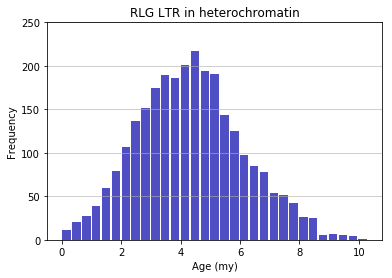

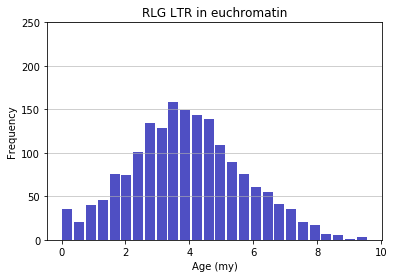

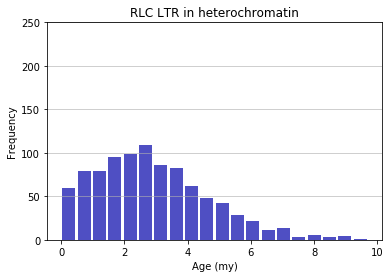

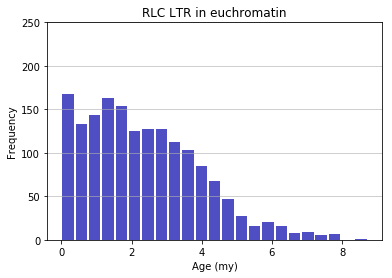

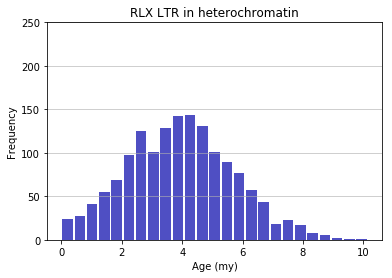

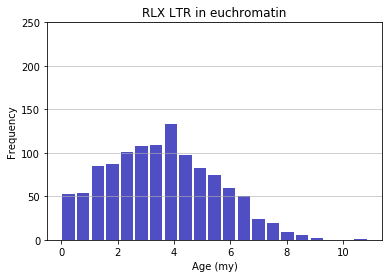

In [44]:
terms = []
terms.append( ('RLG','heterochromatin') )
terms.append( ('RLG','euchromatin') )
terms.append( ('RLC','heterochromatin') )
terms.append( ('RLC','euchromatin') )
terms.append( ('RLX','heterochromatin') )
terms.append( ('RLX','euchromatin') )
for (what, where) in terms:
    df_genome_parts_now = df_genome_parts[df_genome_parts.feature == where]
    print(len(df_genome_parts_now.index))
    df_genome_parts_now.head(3)

    df_ages_now = df_ages[(df_ages.ID.str.contains(what)) & (df_ages.ID.str.contains("LTR"))]
    print(len(df_ages_now.index))
    df_ages_now.sample(3)

    saved = []
    for k,v in df_genome_parts_now.iterrows():
        df_filter = df_ages_now[(df_ages_now.seqname == v.seqname) &
                                (df_ages_now.start <= v.end) &
                                (df_ages_now.end >= v.start) ]
        saved.append(df_filter)
    df_res = pd.concat(saved)

    print(len(df_res.index))

    print(len(df_res.ID.unique()))

    path_save = 'data/plots/%s_%s' % (what, where)
    df_res.to_csv(path_save + '.csv', index=None)

    x = (df_res.Age / 1000000).tolist()

    # An "interface" to matplotlib.axes.Axes.hist() method
    fig = plt.figure()
    n, bins, patches = plt.hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Age (my)')
    plt.ylabel('Frequency')
    plt.title('%s LTR in %s' % (what, where))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim([0,ylim])
    fig.savefig(path_save + '.svg', dpi=fig.dpi)
    print(path_save)